# Exercise 6.6 - Sourcing & Analyzing Time-Series Data

## This script contains the following:

### 1. Importing libraries, paths, and data
### 2. Clean and prep data for Time-Series analysis
### 3. Time-Series Analysis: Decomposition
### 4. Testing for Stationarity
### 5. Stationarizing Chocolate Bar Ratings Data

#### -

## 1. Importing libraries, paths, and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
#Using .api imports the public access version of statsmodels, which is a library that handles statistical models 
import os

In [2]:
#Ensure graphs are plotted without calling them specifically
%matplotlib inline

In [3]:
#Create path
path = r'/Users/puneet/Desktop/Chocolate Bar Analysis 09-2025'

In [4]:
#Import cleaned Chocolate Bar Ratings data
df = pd.read_csv(os.path.join(path, '02-Data', 'Prepared Data Files', 'flavors_of_cacao_cleaned_v3.csv'), index_col=0)

#### -

## 2. Clean and prep data for Time-Series Analysis

In [5]:
#Check data
df.head(10)

,Company,Bar_Name,Reference_Number,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Country,Flavor_Rating
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,São Tomé and Príncipe,Praiseworthy
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo,Satisfactory
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo,Satisfactory
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo,Satisfactory
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru,Satisfactory
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela,Satisfactory
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Unknown,Cuba,Satisfactory
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela,Satisfactory
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela,Praiseworthy
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Unknown,Peru,Premium


In [6]:
#Check nulls
df.isnull().sum()

Company             0
Bar_Name            0
Reference_Number    0
Review_Date         0
Cocoa_Percentage    0
Company_Location    0
Rating              0
Bean_Type           0
Country             0
Flavor_Rating       0
dtype: int64

- No nulls

In [7]:
#Create duplicate subset dataframe
df_dups = df.duplicated()

#Check duplicates dataframe
df_dups.shape

(1795,)

- No duplicates

In [8]:
#Check data-types for all columns
df.dtypes

Company              object
Bar_Name             object
Reference_Number      int64
Review_Date           int64
Cocoa_Percentage    float64
Company_Location     object
Rating              float64
Bean_Type            object
Country              object
Flavor_Rating        object
dtype: object

In [9]:
#Check shape
df.shape

(1795, 10)

- Create subset dataframe with only 'Rating' and 'Review_Date' for time-series analysis
- Aggregate data to show average rating per year
- Import datetime for datetime index 

In [17]:
#Import datetime index
from datetime import datetime

In [31]:
#Create time-series subset dataframe
ts_sub = df[['Review_Date','Rating']]

In [32]:
#Set 'Review_Date' as datetime index
ts_sub['Review_Year'] = pd.to_datetime(ts_sub['Review_Date'], format='%Y')   #Create a datetime column from 'Review_Date'
ts_sub = ts_sub.set_index('Review_Year')                                     #Set new 'Review_Year' as our datetime index

/var/folders/_t/l5t5ly6n7sng4v9pk5llghjh0000gn/T/ipykernel_92060/887124956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_sub['Review_Year'] = pd.to_datetime(ts_sub['Review_Date'], format='%Y')   #Create a datetime column from 'Review_Date'


In [34]:
#Check new 'Review_Year' column
ts_sub.head()

,Review_Date,Rating
Review_Year,,
2016-01-01,2016,3.75
2015-01-01,2015,2.75
2015-01-01,2015,3.00
2015-01-01,2015,3.50
2015-01-01,2015,3.50


In [35]:
#Drop 'Review_Date' column
ts_sub = ts_sub.drop('Review_Date', axis=1)

In [36]:
ts_sub.head()

,Rating
Review_Year,
2016-01-01,3.75
2015-01-01,2.75
2015-01-01,3.00
2015-01-01,3.50
2015-01-01,3.50


In [38]:
#Aggreagate data to show averages
ts_sub = ts_sub.groupby('Review_Year')['Rating'].mean().reset_index()

In [39]:
#Check final time-series subset data frame
ts_sub.head(15)

,Review_Year,Rating
0,2006-01-01,3.125000
1,2007-01-01,3.162338
2,2008-01-01,2.994624
3,2009-01-01,3.073171
4,2010-01-01,3.148649
5,2011-01-01,3.256061
6,2012-01-01,3.178205
7,2013-01-01,3.197011
8,2014-01-01,3.189271
9,2015-01-01,3.246491


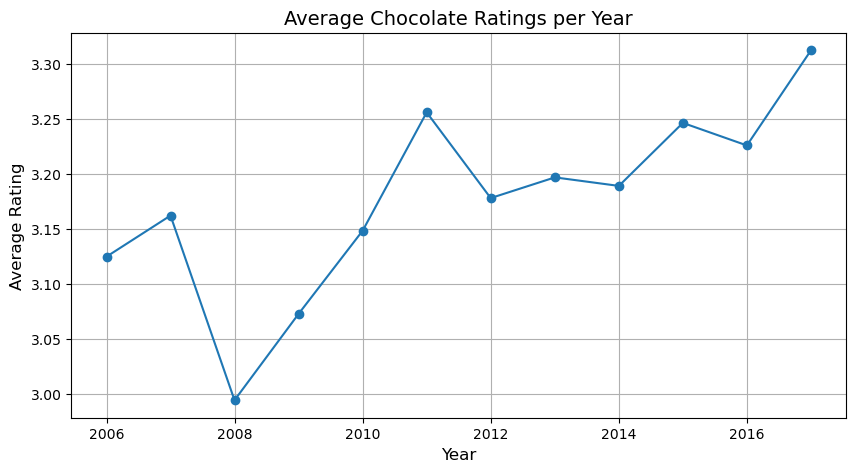

In [46]:
#Plot line chart of final subset dataframe
plt.figure(figsize=(10,5))
plt.plot(ts_sub['Review_Year'], ts_sub['Rating'], marker='o')

#Titles and Labels
plt.title('Average Chocolate Ratings per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

#Show gridlines
plt.grid(True)

#Save plot
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations', 'average_ratings_line.png'),
           dpi=300,
           bbox_inches='tight'
           )

#Show plot
plt.show()

#### -

## 3. Time-Series Analysis: Decomposition

In [61]:
#Decompose the Time-Series using an additive model
decomposition = sm.tsa.seasonal_decompose(ts_sub['Rating'], model = 'additive', period=1)

In [62]:
#This will define a fixed size for all special charts
from pylab import rcParams
rcParams['figure.figsize']=18,7

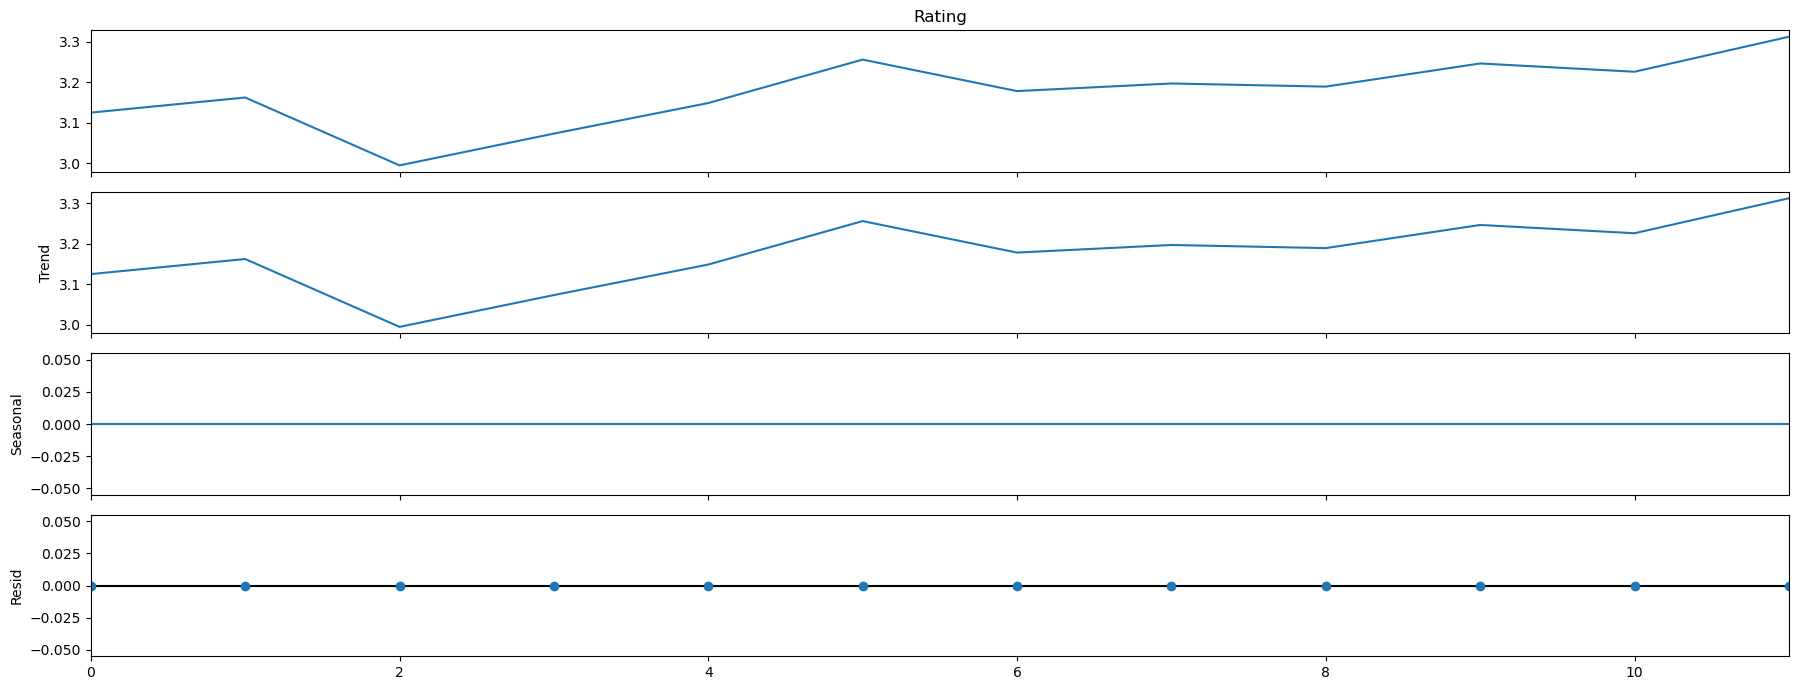

In [65]:
#Plot the seperate components
decomposition.plot()

#Save Plot
plt.savefig(os.path.join(path, '04-Analysis', 'Data Visualizations', 'decomposition_plot.png'),
           dpi=300,
           bbox_inches='tight'
           )

#Show plot
plt.show()

### Decomposed Time-Series Analysis:
- The trend shows that there is a slight increase in average ratings over time
- The seasonal line is stright because we are looking at annual data (period=1), and we would not expect a seaonal effect
- There are little to no residuals, meaning no noise or irregular fluctuations
- With a slight upward trend, we know that we're working with non-stationary data

*Next we will test for stationarity*

#### -

In [66]:
#Import adfuller() function to test for stationarity
from statsmodels.tsa.stattools import adfuller

In [70]:
#Define function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity Test:')
#Perform Dickey-Fuller Test
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(ts_sub['Rating'])

Dickey-Fuller Stationarity Test:
Test Statistic                -1.237766
p-value                        0.657142
Number of Lags Used            3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


### Results:
- The test statistic of -1.24 is LARGER than the critical value (5%) of -3.37
- This means we have a unit root in our data and it is non-stationary (also observed with the graphic above)
- Since the test statistic is larger than the critical value, we DO NOT REJECT the null hypothesis

*Next check for autocorrelations*

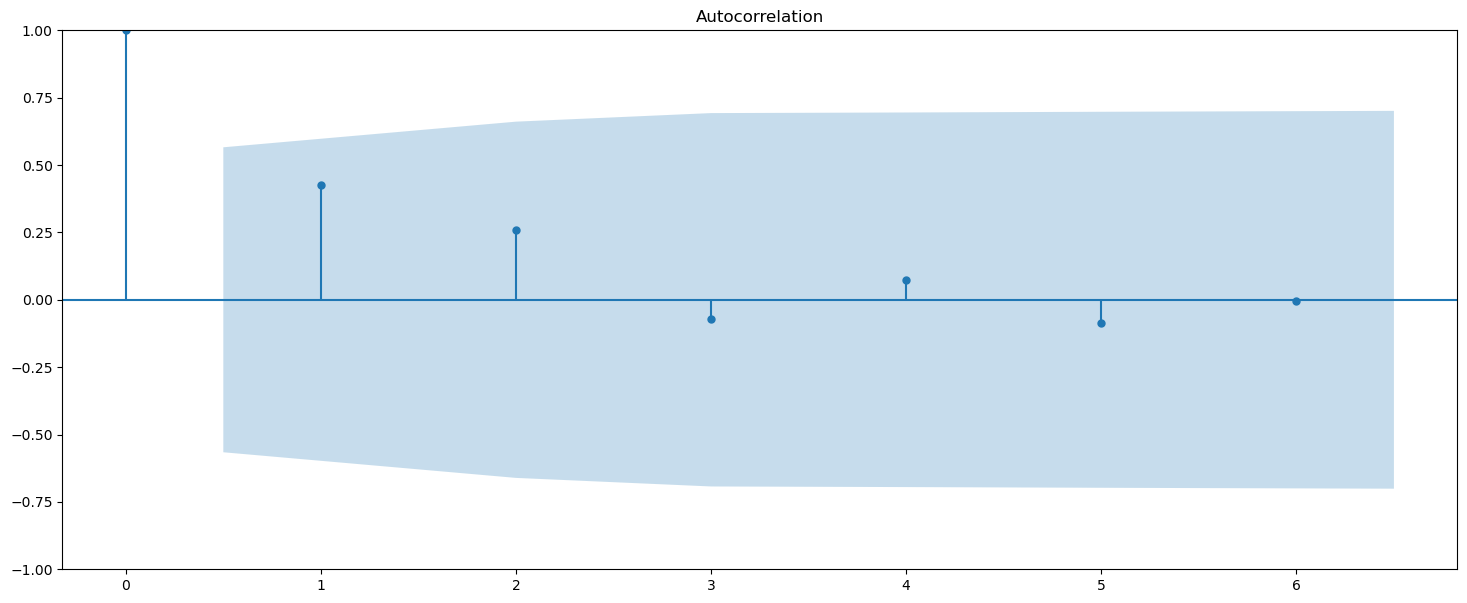

In [72]:
#Import autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot autocorrelation graphic
plot_acf(ts_sub['Rating'])
plt.show()

- There is a lot of autocorrelated data, as most of the data points fall within the confidence interval, confirming the data is non-stationary

*Next step is to stationarize the data using differencing*

#### -

## 5. Stationarizing Chocolate Bar Ratings Data using Differencing

In [77]:
#Create new subset using Differencing formula
ts_diff = ts_sub.diff().dropna()
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [78]:
ts_diff.head()

,Review_Year,Rating
1,365 days,0.037338
2,365 days,-0.167714
3,366 days,0.078547
4,365 days,0.075478
5,365 days,0.107412


In [79]:
ts_diff.columns

Index(['Review_Year', 'Rating'], dtype='object')

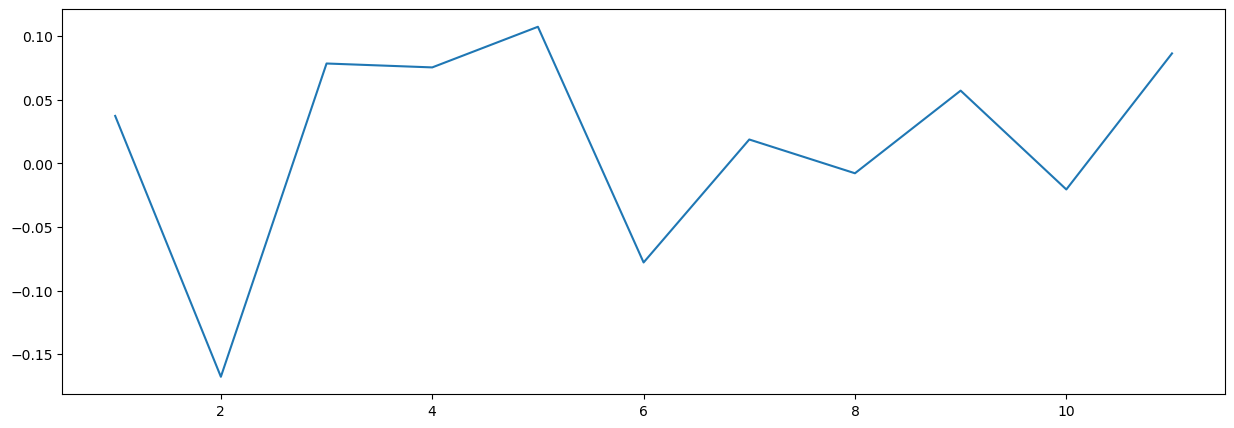

In [83]:
#Plot new Difference subset and check new time-series
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ts_diff['Rating'])

In [81]:
#Preform Dickey-Fuller test
dickey_fuller(ts_diff['Rating'])

Dickey-Fuller Stationarity Test:
Test Statistic                -5.667874e+00
p-value                        9.063533e-07
Number of Lags Used            2.000000e+00
Number of Observations Used    8.000000e+00
Critical Value (1%)           -4.665186e+00
Critical Value (5%)           -3.367187e+00
Critical Value (10%)          -2.802961e+00
dtype: float64


### Results after Differencing:
- The test statistic (-5.67) is SMALLER than the critical value (5%) of -3.37
- The p-value is also much SMALLER than .05, which means we CAN REJECT the null hypothesis
- THe average chocolate bar ratings are now considered stationary after differencing
- THe time-series data is now more suitable for forecasting methods 

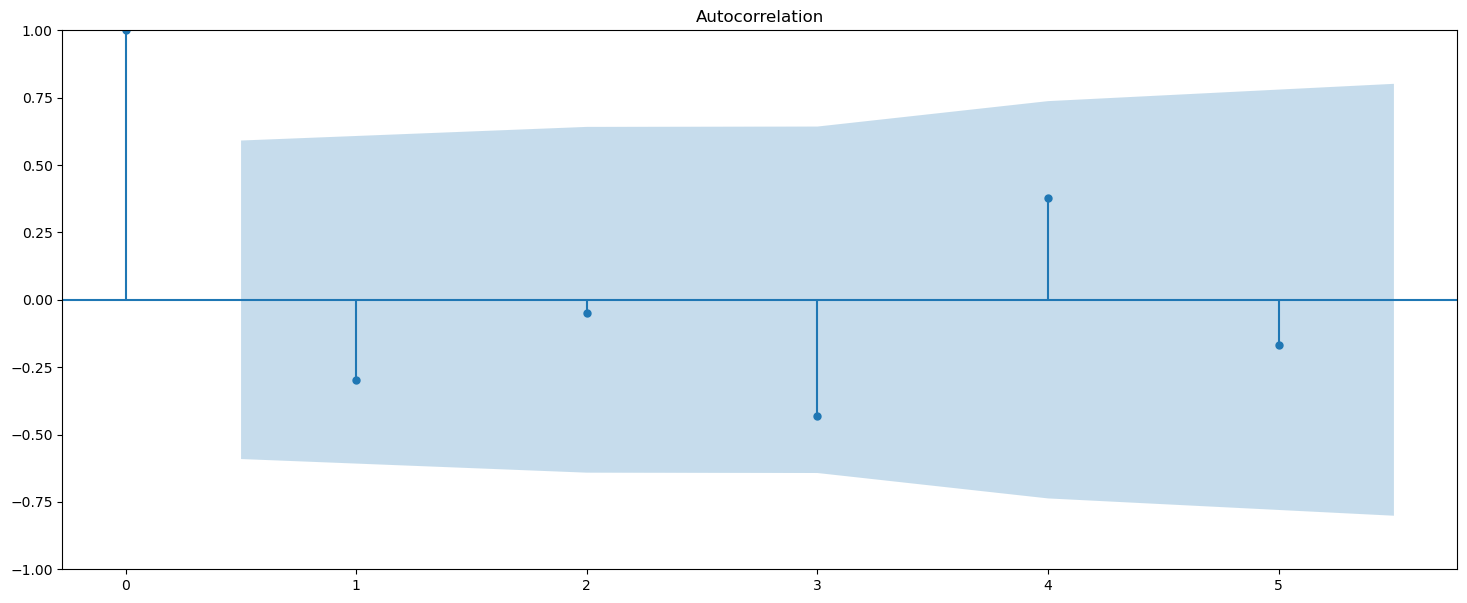

In [84]:
#Final Autocorrelation chceck
plot_acf(ts_diff['Rating'])
plt.show()